In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('../Data/vaccination_all_tweets.csv')

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df['country_name']=df['user_location'].str.split(',').str[-1]

In [5]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,country_name
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,CA
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,CA
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Your Bed
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,BC - Canada
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,NaN


In [6]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'country_name'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193272 non-null  int64 
 1   user_name         193271 non-null  object
 2   user_location     134699 non-null  object
 3   user_description  179542 non-null  object
 4   user_created      193272 non-null  object
 5   user_followers    193272 non-null  int64 
 6   user_friends      193272 non-null  int64 
 7   user_favourites   193272 non-null  int64 
 8   user_verified     193272 non-null  bool  
 9   date              193272 non-null  object
 10  text              193272 non-null  object
 11  hashtags          152299 non-null  object
 12  source            193153 non-null  object
 13  retweets          193272 non-null  int64 
 14  favorites         193272 non-null  int64 
 15  is_retweet        193272 non-null  bool  
 16  country_name      134699 non-null  obj

# check on null values 

In [8]:
df.isna().sum()

id                      0
user_name               1
user_location       58573
user_description    13730
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            40973
source                119
retweets                0
favorites               0
is_retweet              0
country_name        58573
dtype: int64

In [9]:
# drop not needed columns 
df.drop(columns={"id","user_name","user_description","user_created","user_followers",\
                   "user_friends","user_favourites","user_verified","source","retweets","favorites","is_retweet"},inplace=True)

In [10]:
df.head()

,user_location,date,text,hashtags,country_name
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],CA
1,"San Francisco, CA",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,CA
2,Your Bed,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Your Bed
3,"Vancouver, BC - Canada",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,BC - Canada
4,NaN,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",NaN


In [11]:
df.isna().sum()

user_location    58573
date                 0
text                 0
hashtags         40973
country_name     58573
dtype: int64

In [12]:
df.drop(columns={"user_location"},inplace=True)

In [13]:
df.head()

,date,text,hashtags,country_name
0,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],CA
1,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,CA
2,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Your Bed
3,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,BC - Canada
4,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          193272 non-null  object
 1   text          193272 non-null  object
 2   hashtags      152299 non-null  object
 3   country_name  134699 non-null  object
dtypes: object(4)
memory usage: 5.9+ MB


In [15]:
df['date'] = pd.to_datetime(df['date']).dt.date  
df.head()

,date,text,hashtags,country_name
0,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],CA
1,2020-12-13,While the world has been on the wrong side of ...,NaN,CA
2,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Your Bed
3,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,BC - Canada
4,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          193272 non-null  object
 1   text          193272 non-null  object
 2   hashtags      152299 non-null  object
 3   country_name  134699 non-null  object
dtypes: object(4)
memory usage: 5.9+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, ' India'),
  Text(1, 0, 'India'),
  Text(2, 0, ' USA'),
  Text(3, 0, ' Canada  and Worldwide'),
  Text(4, 0, ' CA'),
  Text(5, 0, ' England'),
  Text(6, 0, 'United States'),
  Text(7, 0, ' Ontario'),
  Text(8, 0, ' Pakistan'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' NY'),
  Text(11, 0, 'Sri Lanka'),
  Text(12, 0, 'New Delhi'),
  Text(13, 0, ' China'),
  Text(14, 0, ' TX'),
  Text(15, 0, 'Mumbai'),
  Text(16, 0, 'Canada'),
  Text(17, 0, 'London'),
  Text(18, 0, ' FL'),
  Text(19, 0, 'Beijing')])

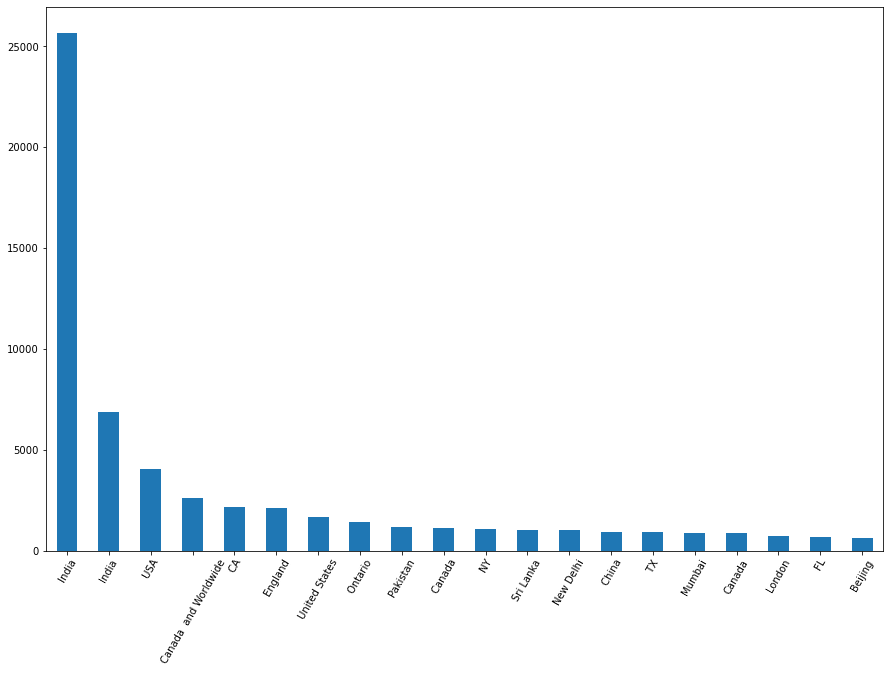

In [17]:
plt.figure(figsize=(15,10))
df['country_name'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, "['COVAXIN', 'BBMP']"),
  Text(1, 0, "['Moderna']"),
  Text(2, 0, "['COVAXIN']"),
  Text(3, 0, "['Covaxin']"),
  Text(4, 0, "['SputnikV']"),
  Text(5, 0, "['Sinopharm']"),
  Text(6, 0, "['Sinovac']"),
  Text(7, 0, "['moderna']"),
  Text(8, 0, "['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']"),
  Text(9, 0, "['COVID19']"),
  Text(10, 0, "['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']"),
  Text(11, 0, "['covaxin']")])

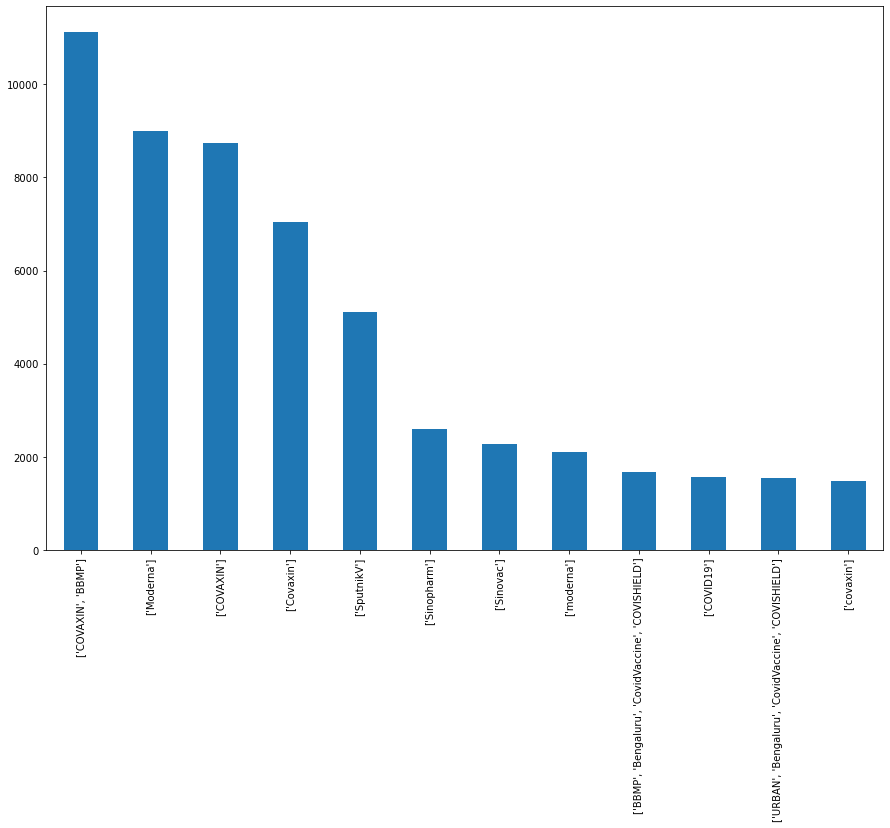

In [18]:
#Visualizing Tweet Platform-wise Distribution 
plt.figure(figsize=(15,10))
df['hashtags'].value_counts().nlargest(12).plot(kind='bar')
plt.xticks(rotation=90)

In [19]:
def clean_data(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    
    return text

In [20]:
df['clean_text'] = df['text'].apply(clean_data)
df.head()

,date,text,hashtags,country_name,clean_text
0,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],CA,same folks said daikon paste could treat a cyt...
1,2020-12-13,While the world has been on the wrong side of ...,NaN,CA,while the world has been on the wrong side of ...
2,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Your Bed,coronavirus sputnikv astrazeneca pfizerbiontec...
3,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,BC - Canada,"facts are immutable, senator, even when you're..."
4,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",NaN,explain to me again why we need a vaccine wh...
